In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import string
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import geojson

In [11]:
combined_counts = []
df_trips = pd.read_csv('.\STL_GTFS\GTF_STL_20200831\\trips.txt')
service_route_counts = df_trips.groupby(['service_id', 'route_id']).size().reset_index(name='count')
combined_counts.append(service_route_counts)
combined_df = pd.concat(combined_counts, ignore_index=True)
csv_output_path = os.path.join('C:\\Users\\justi\\Documents\\Le Devoir\\STL', 'GTF_STL_20200831.csv')
combined_df.to_csv(csv_output_path, index=False)

In [7]:
base_dir = '.\STL_GTFS'

combined_counts = []

for directory in os.listdir(base_dir):
    trips_file_path = os.path.join(base_dir, directory, 'trips.txt')
    if os.path.exists(trips_file_path):
        print(f'Processing {trips_file_path}...')
        df_trips = pd.read_csv(trips_file_path)
        if 'service_id' in df_trips.columns and 'route_id' in df_trips.columns:
            service_route_counts = df_trips.groupby(['service_id', 'route_id']).size().reset_index(name='count')
            service_route_counts['directory'] = directory
            combined_counts.append(service_route_counts)
        else:
            print(f'Columns "service_id" and "route_id" not found in {trips_file_path}.')
    else:
        print(f'File {trips_file_path} not found.')
            
if combined_counts:
    combined_df = pd.concat(combined_counts, ignore_index=True)
    csv_output_path = os.path.join('C:\\Users\\justi\\Documents\\Le Devoir\\STL', 'combined_service_route_counts.csv')
    combined_df.to_csv(csv_output_path, index=False)
else:
    print('No data found to combine.')

Processing .\STL_GTFS\GTFS_AOUT21_REGULIER\trips.txt...
Processing .\STL_GTFS\GTFS_JANV21_REGULIER\trips.txt...
Processing .\STL_GTFS\GTFS_JUIN21_REGULIER\trips.txt...
Processing .\STL_GTFS\GTFS_MARS21_REGULIER\trips.txt...
Processing .\STL_GTFS\GTF_STL_20170310\trips.txt...
Processing .\STL_GTFS\GTF_STL_20170615\trips.txt...
Processing .\STL_GTFS\GTF_STL_20170815\trips.txt...
Processing .\STL_GTFS\GTF_STL_20171220\trips.txt...
Processing .\STL_GTFS\GTF_STL_20180316\trips.txt...
Processing .\STL_GTFS\GTF_STL_20180606\trips.txt...
Processing .\STL_GTFS\GTF_STL_20180813\trips.txt...
Processing .\STL_GTFS\GTF_STL_20181214\trips.txt...
Processing .\STL_GTFS\GTF_STL_20190314\trips.txt...
Processing .\STL_GTFS\GTF_STL_20190610\trips.txt...
Processing .\STL_GTFS\GTF_STL_20190813\trips.txt...
Processing .\STL_GTFS\GTF_STL_20190919\trips.txt...
Processing .\STL_GTFS\GTF_STL_20190924\trips.txt...
Processing .\STL_GTFS\GTF_STL_20191217\trips.txt...
Processing .\STL_GTFS\GTF_STL_20200313\trips.txt

In [17]:
base_dir = 'C:\\Users\\justi\\Documents\\Le Devoir\\STL\\STL_GTFS'

# Liste pour stocker les DataFrames des fichiers calendar.txt de chaque répertoire
combined_calendars = []

# Parcourir les répertoires commençant par GTF_STL_
for directory in os.listdir(base_dir):
        # Construire le chemin vers le fichier calendar.txt
        calendar_file_path = os.path.join(base_dir, directory, 'calendar.txt')
        
        # Vérifier si le fichier calendar.txt existe
        if os.path.exists(calendar_file_path):
            print(f'Processing {calendar_file_path}...')
            
            # Charger le fichier calendar.txt
            df_calendar = pd.read_csv(calendar_file_path)
            
            # Ajouter une colonne pour indiquer le répertoire (facultatif)
            df_calendar['directory'] = directory
            
            # Ajouter le DataFrame dans la liste
            combined_calendars.append(df_calendar)
        else:
            print(f'File {calendar_file_path} not found.')

# Combiner tous les fichiers calendar.txt en un seul grand DataFrame
if combined_calendars:
    combined_calendar_df = pd.concat(combined_calendars, ignore_index=True)
    
    # Définir le répertoire où tu veux enregistrer le fichier CSV combiné
    output_dir = 'C:\\Users\\justi\\Documents\\Le Devoir\\STL'
    
    # S'assurer que le répertoire de sortie existe
    os.makedirs(output_dir, exist_ok=True)
    
    # Chemin complet du fichier CSV combiné
    csv_output_path = os.path.join(output_dir, 'combined_calendar.csv')
    
    # Sauvegarder le DataFrame combiné dans un fichier CSV
    combined_calendar_df.to_csv(csv_output_path, index=False)
    
    print(f'Fichier CSV combiné créé avec succès : {csv_output_path}')
else:
    print('No calendar.txt files were found.')


Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTFS_AOUT21_REGULIER\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTFS_JANV21_REGULIER\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTFS_JUIN21_REGULIER\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTFS_MARS21_REGULIER\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTF_STL_20170310\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTF_STL_20170615\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTF_STL_20170815\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTF_STL_20171220\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTF_STL_20180316\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTF_STL_20180606\calendar.txt...
Processing C:\Users\justi\Documents\Le Devoir\STL\STL_GTFS\GTF_S

In [107]:
df = pd.read_csv('combined_service_route_counts.csv')
df['route_name'] = df['route_id'].str[6:]

In [120]:
unique_rn_df = pd.DataFrame(df['route_name'].unique(), columns=['route_name'])
unique_rn_df.to_csv('C:\\Users\\justi\\Documents\\Le Devoir\\STL\\trips_per_route_per_day_FER.csv', index=False)

In [121]:
row_csv = pd.read_csv('C:\\Users\\justi\\Documents\\Le Devoir\\STL\\combined_calendar.csv')
filtered_rows = row_csv[row_csv['service_id'].str.startswith(('JR', 'N'))]
column_names = filtered_rows['service_id'].tolist()
for col in column_names:
    unique_rn_df[col] = None
unique_rn_df.to_csv('C:\\Users\\justi\\Documents\\Le Devoir\\STL\\trips_per_route_per_day_FER.csv', index=False)

In [122]:
df_combined_count = pd.read_csv('combined_service_route_counts.csv')
df = pd.read_csv('C:\\Users\\justi\\Documents\\Le Devoir\\STL\\trips_per_route_per_day_FER.csv')
dates = df.columns
dates = dates[1:]
routes = unique_rn_df['route_name']
for route in routes:
    for date in dates:
        value = df_combined_count.loc[(df_combined_count['service_id'] == date) & (df_combined_count['route_name'] == route), 'count']
        if not value.empty:
            df.loc[df['route_name'] == route, date] = value.values[0]
df.to_csv('C:\\Users\\justi\\Documents\\Le Devoir\\STL\\trips_per_route_per_day_FER.csv', index=False)

# Graphique trajet par jour

## Un bus

In [93]:
df_calendar = pd.read_csv('combined_calendar.csv')
df_trips_per_day = pd.read_csv('trips_per_route_per_day_SEM.csv')
bus = '26E'

In [3]:
dates_id = df_trips_per_day.columns[1:]
dates = []
for date_id in dates_id:
    dates.append(df_calendar.loc[df_calendar['service_id'] == date_id]['start_date'].values[0])
dates = pd.to_datetime(dates, format='%Y%m%d')

In [4]:
counts = df_trips_per_day.loc[df_trips_per_day['route_name'] == bus].values[0][1:]

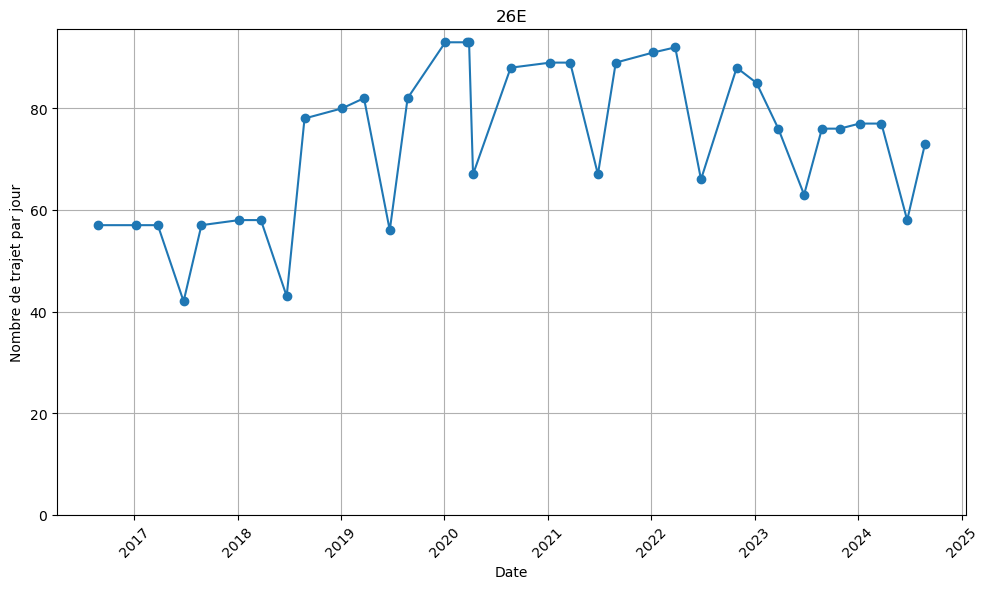

In [5]:
plt.figure(figsize=(10, 6))  # Taille du graphique
plt.plot(dates, counts, marker='o')
plt.title(bus)
plt.xlabel('Date')
plt.ylabel('Nombre de trajet par jour')
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Tout les bus

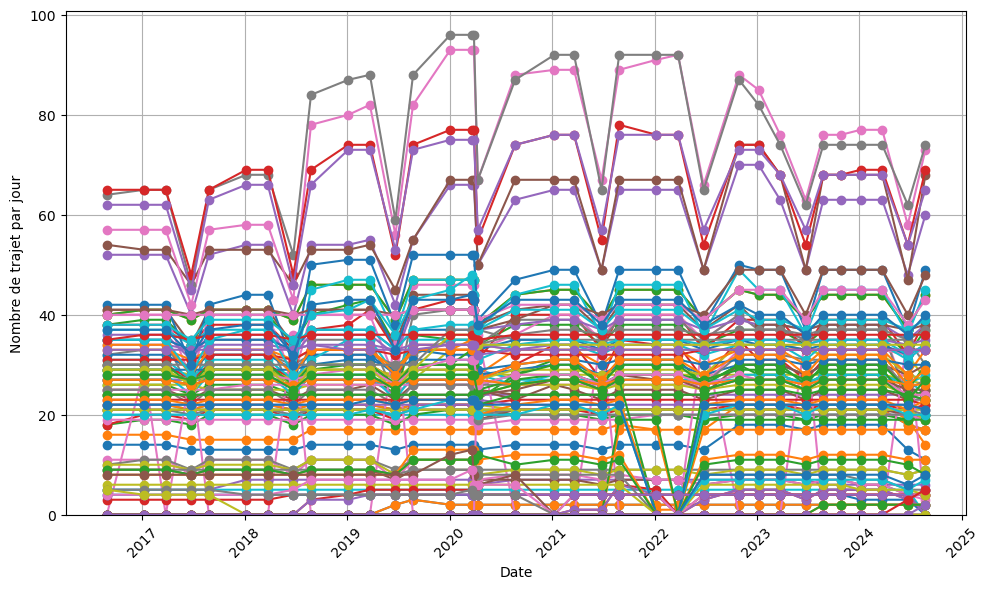

In [6]:
plt.figure(figsize=(10, 6))
for row in df_trips_per_day.itertuples(index=False, name=None):
    plt.plot(dates, row[1:], marker='o')
plt.xlabel('Date')
plt.ylabel('Nombre de trajet par jour')
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Un bus pour une fenetre dans l'annee

In [7]:
bus = '42O'
periode = 'AOUT'

In [8]:
selected_id = df_calendar[df_calendar['service_id'].str.startswith((periode)) & df_calendar['service_id'].str.endswith(('SEM'))]['service_id']

In [9]:
selected_count_date = df_trips_per_day[selected_id]
selected_count_date['route_name'] = df_trips_per_day['route_name']
colonnes = ['route_name'] + [col for col in selected_count_date.columns if col != 'route_name']
selected_count_date = selected_count_date[colonnes]

C:\Users\justi\AppData\Local\Temp\ipykernel_9668\1103673638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_count_date['route_name'] = df_trips_per_day['route_name']


In [10]:
dates_id = df_trips_per_day.columns[1:]
dates = []
for date_id in dates_id:
    if date_id.startswith((periode)):
        dates.append(df_calendar.loc[df_calendar['service_id'] == date_id]['start_date'].values[0])
dates = pd.to_datetime(dates, format='%Y%m%d')

In [11]:
counts = selected_count_date.loc[selected_count_date['route_name'] == bus].values[0][1:]

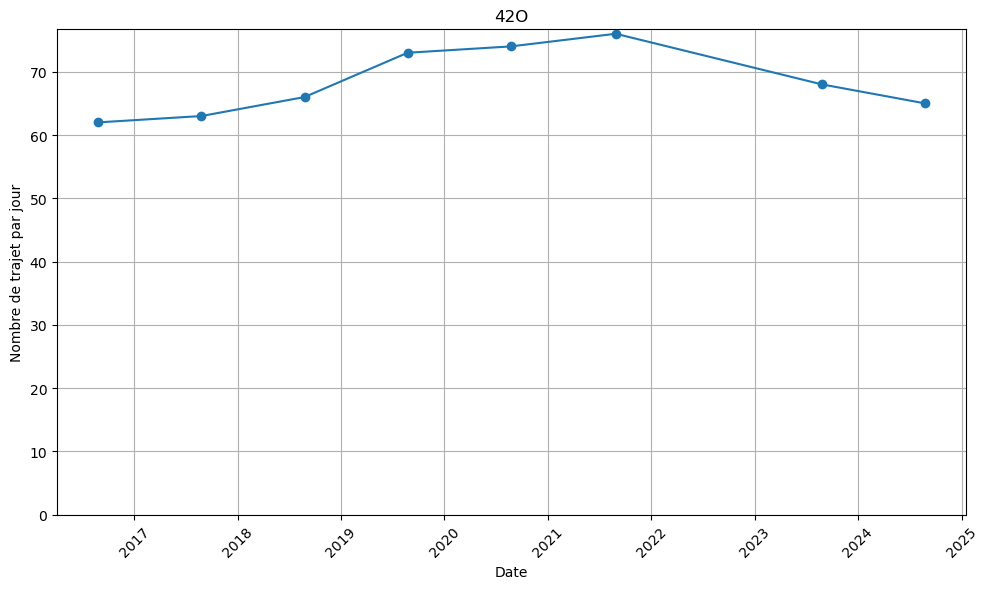

In [12]:
plt.figure(figsize=(10, 6))  # Taille du graphique
plt.plot(dates, counts, marker='o')
plt.title(bus)
plt.xlabel('Date')
plt.ylabel('Nombre de trajet par jour')
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Tout les bus pour une fenetre dans l'annee

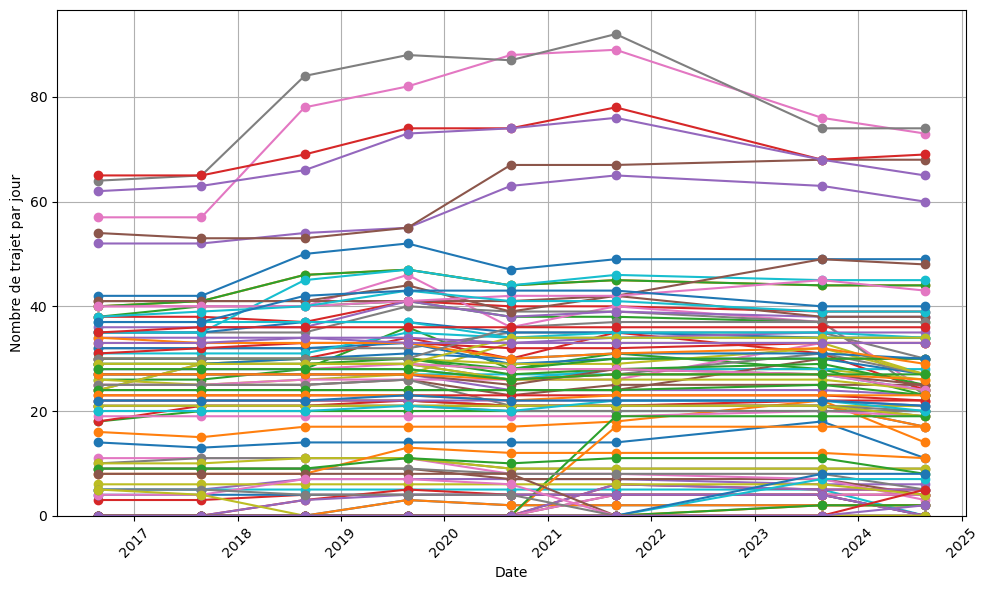

In [13]:
plt.figure(figsize=(10, 6))
for row in selected_count_date.itertuples(index=False, name=None):
    plt.plot(dates, row[1:], marker='o')
plt.xlabel('Date')
plt.ylabel('Nombre de trajet par jour')
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Achalandage pour un bus

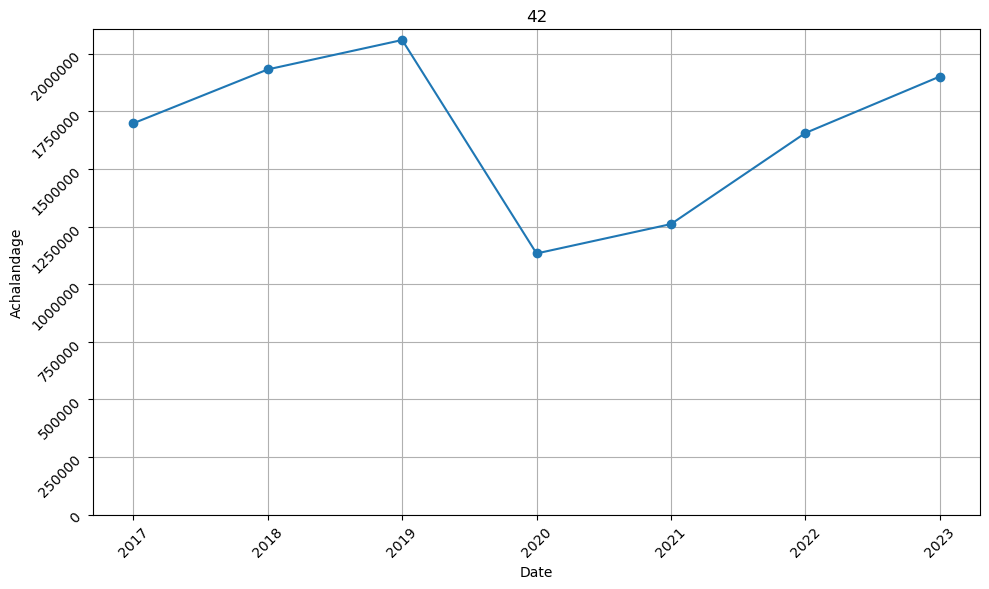

In [77]:
bus = str(42)
dates = df_new_achalandage.columns[1:]
counts = df_new_achalandage.loc[df_new_achalandage['Ligne'] == bus].values[0][1:]
plt.figure(figsize=(10, 6))  # Taille du graphique
plt.plot(dates, counts, marker='o')
plt.title(bus)
plt.xlabel('Date')
plt.ylabel('Achalandage')
plt.ticklabel_format(style='plain')
plt.yticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Achalandage pour tout les bus

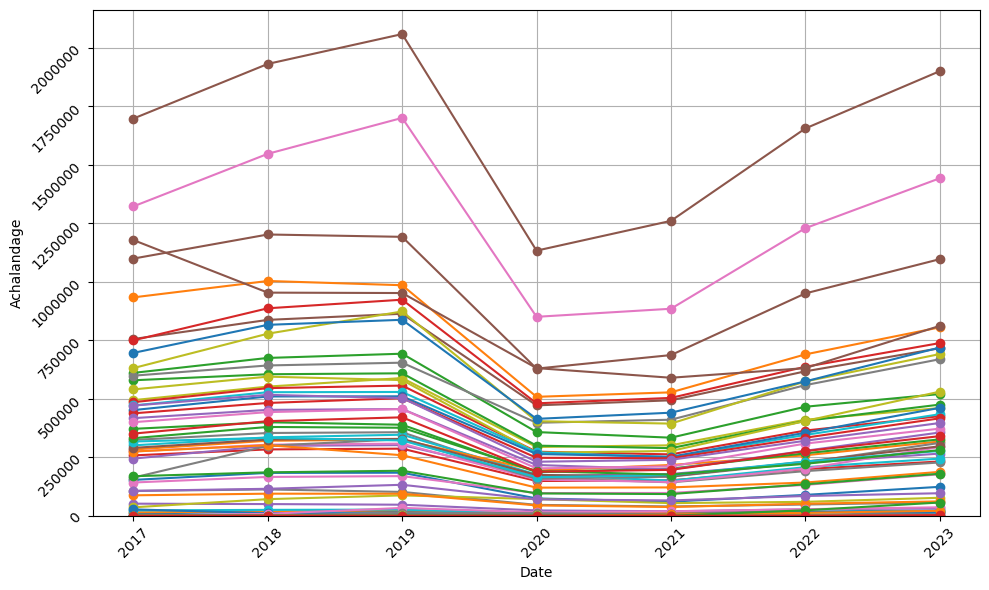

In [79]:
dates = df_new_achalandage.columns[1:]
plt.figure(figsize=(10, 6))
for row in df_new_achalandage.itertuples(index=False, name=None):
    plt.plot(dates, row[1:], marker='o')
plt.xlabel('Date')
plt.ylabel('Achalandage')
plt.ticklabel_format(style='plain')
plt.yticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Nombre total de trajet par jour

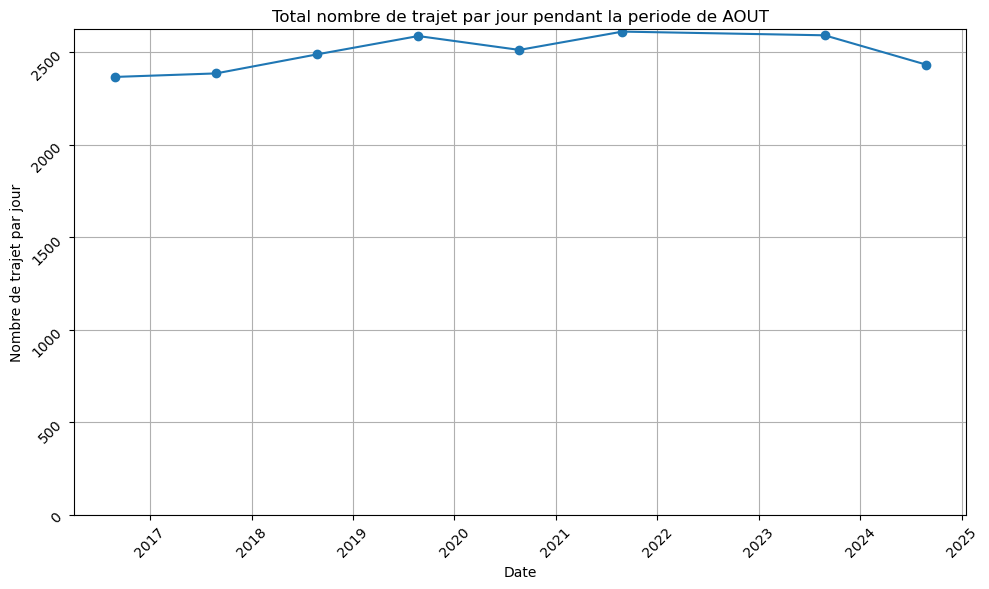

In [124]:
periode = 'AOUT'
df_trips_per_day = pd.read_csv('trips_per_route_per_day_SEM.csv')
totals = df_trips_per_day.sum()[1:]
df_trips_per_day.loc[len(df_trips_per_day)] = ['total'] + totals.tolist()
dates_id = df_trips_per_day.columns[1:]
dates = []
for date_id in dates_id:
    if date_id.startswith((periode)):
        dates.append(df_calendar.loc[df_calendar['service_id'] == date_id]['start_date'].values[0])
dates = pd.to_datetime(dates, format='%Y%m%d')
totals = df_trips_per_day.loc[len(df_trips_per_day)-1]
selected_id = df_calendar[df_calendar['service_id'].str.startswith((periode)) & df_calendar['service_id'].str.endswith(('SEM'))]['service_id']
counts = totals[selected_id]
plt.figure(figsize=(10, 6))  # Taille du graphique
plt.plot(dates, counts, marker='o')
plt.title('Total nombre de trajet par jour pendant la periode de ' + periode)
plt.xlabel('Date')
plt.ylabel('Nombre de trajet par jour')
plt.yticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

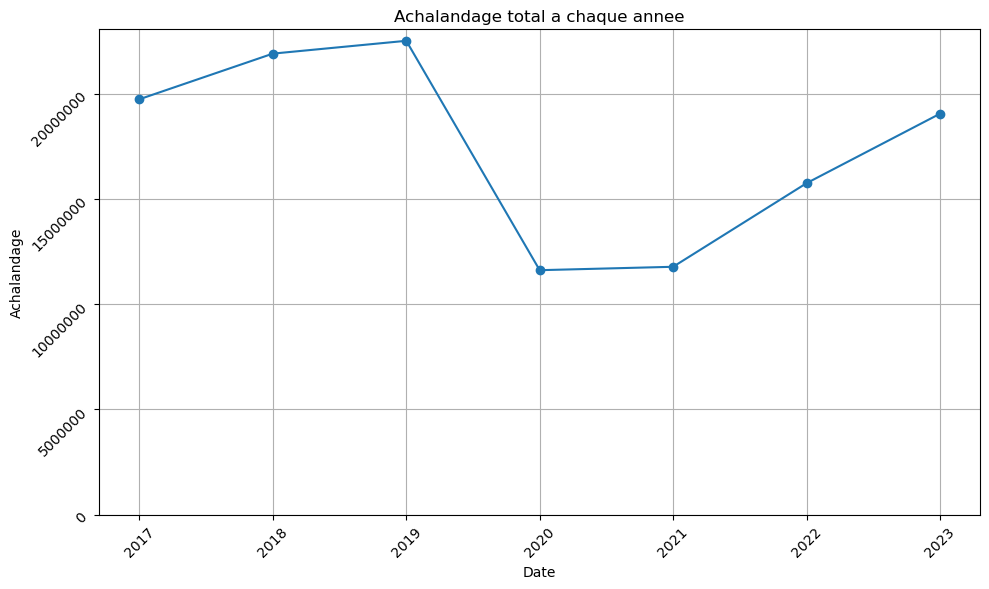

In [125]:
totals = df_new_achalandage.sum()[1:]
dates = df_new_achalandage.columns[1:]
plt.figure(figsize=(10, 6))  # Taille du graphique
plt.plot(dates, totals, marker='o')
plt.title("Achalandage total a chaque annee")
plt.xlabel('Date')
plt.ylabel('Achalandage')
plt.ticklabel_format(style='plain')
plt.yticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# Map setting

In [7]:
base_dir = 'C:\\Users\\justi\\Documents\\Le Devoir\\STL\\STL_GTFS\\GTF_STL_20240824'
shapes_file_path = os.path.join(base_dir, 'shapes.txt')
df_shapes = pd.read_csv(shapes_file_path)

In [9]:
trips_file_path = os.path.join(base_dir, 'trips.txt')
df_trips = pd.read_csv(trips_file_path)

In [102]:
current_bus = None
routes_shapes = []

for value in df_shapes.values:
    if value[0] != current_bus:
        current_bus = value[0]
        routes_shapes.append({"route":value[0][6:], "coordinates" : [], 'achalandage': 0, 'trips_per_day': 0})
    routes_shapes[len(routes_shapes) - 1]['coordinates'].append([value[2], value[1]])

In [103]:
df_achalandage = pd.read_csv('achalandage_STL_2017-2023.csv')

for i in range(0, len(routes_shapes)-1):
    localisation_achalandage = df_achalandage.loc[df_achalandage['Ligne'] == routes_shapes[i]['route'][:-2]]
    localisation_trips = df_trips_per_day.loc[df_trips_per_day['route_name'] == routes_shapes[0]['route'][:-1]]
    if not localisation_achalandage.empty or localisation_trips.empty:
        if localisation_achalandage['2019.0'].values[0] != 0:
            routes_shapes[i]['achalandage'] = localisation_achalandage['2023.0'].values[0]/localisation_achalandage['2022.0'].values[0]
        if localisation_trips['AOUT19SEM'].values[0] != 0:
            routes_shapes[i]['trips_per_day'] = localisation_trips['AOUT24SEM'].values[0]/localisation_trips['AOUT23SEM'].values[0]
    else:
        print(routes_shapes[i]['route'])

322E1
322E3
322O2


In [105]:
features = []

for route in routes_shapes:
    features.append(geojson.Feature(
        geometry=geojson.LineString(route['coordinates']),
        properties={"name": route['route'], "traffic": route['achalandage'], "trips": route['trips_per_day']}
    ))

feature_collection = geojson.FeatureCollection(features)

# Save to a GeoJSON file
with open('bus_routes.geojson', 'w') as f:
    geojson.dump(feature_collection, f)